In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import pandas as pd
from plotnine import *

In [3]:
results_annotated = pd.read_json("../data/results_annotated.jsonl", lines=True, orient='records')

In [17]:
tmp = (
    results_annotated
    .assign(score = lambda d: d['label'] == 'Correct')
    .pivot_table(index="model",columns="format",values="score",aggfunc="count")
    .fillna(0).astype(int)
)

tmp

format,direct_ask,with_instructor
model,,
bedrock/anthropic.claude-3-haiku-20240307-v1:0,45,45
bedrock/anthropic.claude-3-opus-20240229-v1:0,45,45
bedrock/anthropic.claude-3-sonnet-20240229-v1:0,45,45
gemini-1.5-pro-preview-0409,45,45
gpt-3.5-turbo,45,45
gpt-4-turbo-2024-04-09,45,45


In [19]:
tmp = (
    results_annotated
    .assign(score = lambda d: d['label'] == 'Correct')
    .pivot_table(index="model",columns="format",values="score",aggfunc="mean")
    .fillna(0).astype(float)
)

tmp

format,direct_ask,with_instructor
model,,
bedrock/anthropic.claude-3-haiku-20240307-v1:0,0.000000,0.422222
bedrock/anthropic.claude-3-opus-20240229-v1:0,0.644444,0.955556
bedrock/anthropic.claude-3-sonnet-20240229-v1:0,0.044444,0.688889
gemini-1.5-pro-preview-0409,0.000000,0.977778
gpt-3.5-turbo,0.044444,0.244444
gpt-4-turbo-2024-04-09,0.200000,0.977778


In [20]:
model_sort = [
    "gpt-3.5-turbo",
    "bedrock/anthropic.claude-3-haiku-20240307-v1:0",
    "bedrock/anthropic.claude-3-sonnet-20240229-v1:0",
    "gemini-1.5-pro-preview-0409",
    "gpt-4-turbo-2024-04-09",
    "bedrock/anthropic.claude-3-opus-20240229-v1:0",
][::-1]

method_sort = ["direct_ask","structured_output"]

In [21]:
summary_df = (
    results_annotated
    .assign(method = lambda d: d['format'].str.replace("with_instructor","structured_output"))
    .assign(score = lambda d: d['label'] == 'Correct')
    .groupby(["model","method"],as_index=False)
    ["score"]
    .mean()
    .sort_values(by='score',ascending=False)
    .assign(
        model = lambda d: pd.Categorical(d['model'], categories=model_sort),
        method = lambda d: pd.Categorical(d['method'], categories=method_sort),
        )
)


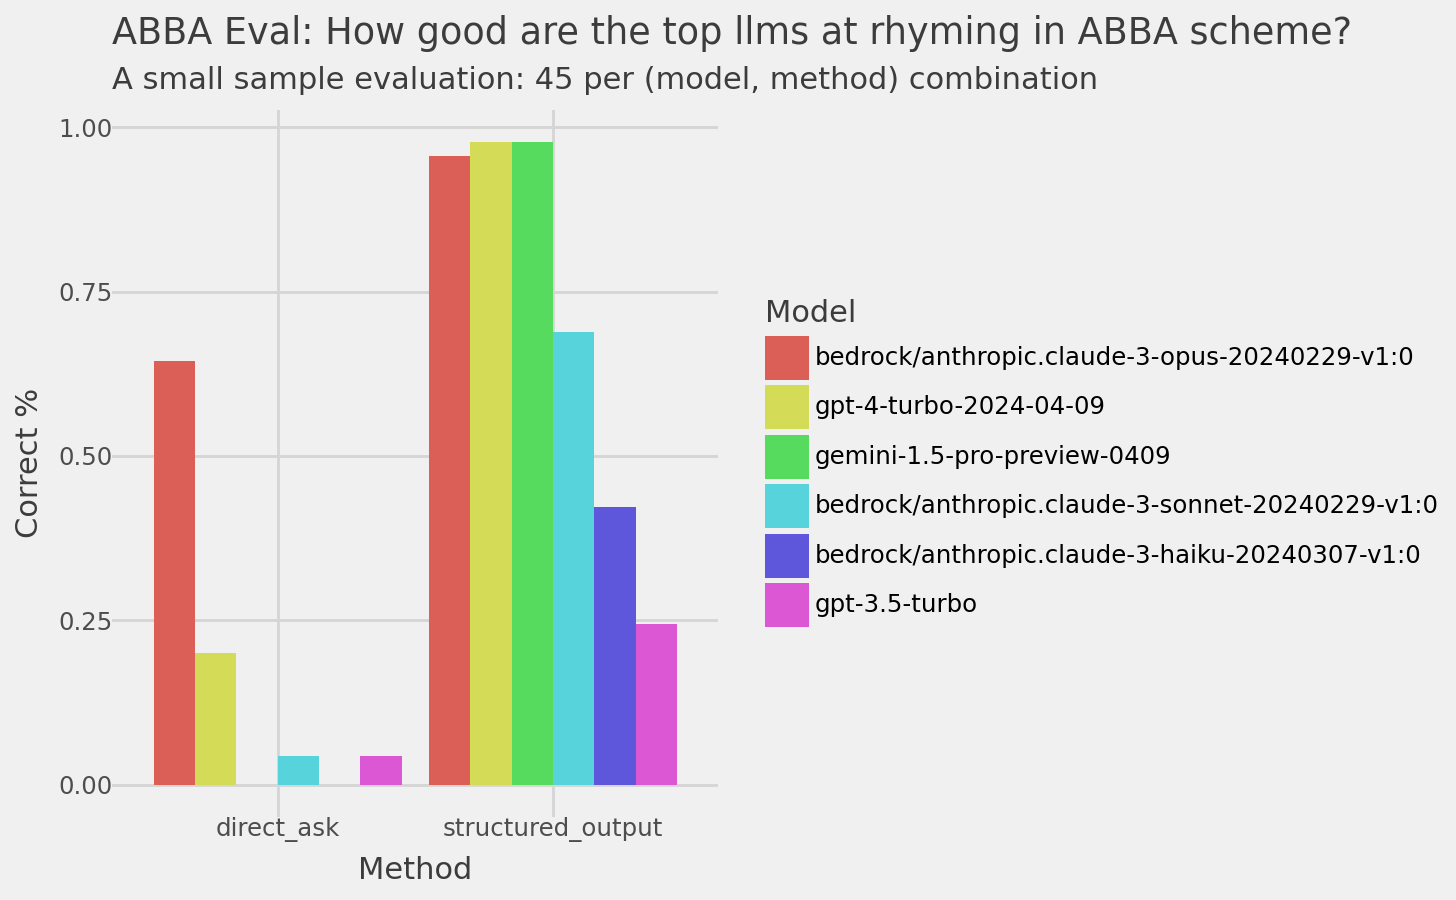

In [31]:
p = (
    ggplot(summary_df)
    + aes(x="factor(method)", y="score", fill="model")
    + geom_bar(stat="identity", position="dodge")
    + theme_538()
    + theme(figure_size=(4.5 * 1.618, 4.5))
    + labs(
        x="Method",
        y="Correct %",
        fill="Model",
        title="ABBA Eval: How good are the top llms at rhyming in ABBA scheme?",
        subtitle="A small sample evaluation: 45 per (model, method) combination",
    )
)
p

In [32]:
p.save("../output/results.png", dpi=300)

/Users/rensdimmendaal/code/abba_eval/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 7.281000000000001 x 4.5 in image.
/Users/rensdimmendaal/code/abba_eval/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../output/results.png
